In [1]:
import uproot
import torch
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
%matplotlib inline


In [2]:
FILE_NAME = "LLP_true_times.caloCells_combined.1.root"
DATA_TREE = "caloCells"
TRUTH_TREE = "LLPTruthTree"

trees = uproot.open(FILE_NAME)
print(trees.keys())

# Gets the the latest tree versions
calo_tree = uproot.open(FILE_NAME + ":" + DATA_TREE)
truth_tree = uproot.open(FILE_NAME + ":" + TRUTH_TREE)

['caloCells;17', 'caloCells;16', 'LLPTruthTree;3', 'LLPTruthTree;2', 'collectionTree_caloCells;1']


In [3]:
print("CALO_TREE")
print(*calo_tree.keys(), sep="\n")

print("\n\n\nTRUTH_TREE")
print(*truth_tree.keys(), sep="\n")

CALO_TREE
ei_RunNumber
ei_EventNumber
ei_timestamp
ei_timestamp_ns
ei_lbn
ei_bcid
ei_detmask0
ei_detmask1
ei_actualIntPerXing
ei_averageIntPerXing
ei_mc_channel_number
ei_mc_event_number
ei_mc_event_weight
AntiKt4EMTopoJets_n
AntiKt4EMTopoJets_E
AntiKt4EMTopoJets_pt
AntiKt4EMTopoJets_m
AntiKt4EMTopoJets_eta
AntiKt4EMTopoJets_phi
AntiKt4EMTopoJets_n90
AntiKt4EMTopoJets_Timing
AntiKt4EMTopoJets_LArQuality
AntiKt4EMTopoJets_OriginIndex
AntiKt4EMTopoJets_HECQuality
AntiKt4EMTopoJets_NegativeE
AntiKt4EMTopoJets_AverageLArQF
AntiKt4EMTopoJets_BCH_CORR_CELL
AntiKt4EMTopoJets_BCH_CORR_DOTX
AntiKt4EMTopoJets_BCH_CORR_JET
AntiKt4EMTopoJets_BCH_CORR_JET_FORCELL
AntiKt4EMTopoJets_NumTowers
AntiKt4EMTopoJets_ootFracCells5
AntiKt4EMTopoJets_ootFracCells10
AntiKt4EMTopoJets_ootFracClusters5
AntiKt4EMTopoJets_ootFracClusters10
AntiKt4EMTopoJets_isBadLoose
AntiKt4EMTopoJets_isBadMedium
AntiKt4EMTopoJets_isBadTight
AntiKt4EMTopoJets_isUgly
AntiKt4EMTopoJets_hecf
AntiKt4TruthJets_n
AntiKt4TruthJets_E
Ant

In [4]:
calo_array = calo_tree.arrays(filter_name=["cl_cell_*", "cl_pt"], library="ak", entry_stop=100)
truth_array = truth_tree.arrays(library="ak", entry_stop=100)

print("calo_array")
print(calo_array.type.show())

print("truth_array")
print(truth_array.type.show())

calo_array
100 * {
    cl_pt: var * float32,
    cl_cell_n: var * int32,
    cl_cell_E: var * var * float32,
    cl_cell_pt: var * var * float32,
    cl_cell_eta: var * var * float32,
    cl_cell_phi: var * var * float32,
    cl_cell_QCells: var * var * int32,
    cl_cell_GainCells: var * var * int32,
    cl_cell_DetCells: var * var * int32,
    cl_cell_TimeCells: var * var * float32,
    cl_cell_xCells: var * var * float32,
    cl_cell_yCells: var * var * float32,
    cl_cell_zCells: var * var * float32,
    cl_cell_BadCells: var * var * int32,
    cl_cell_IdCells: var * var * uint32
}
None
truth_array
100 * {
    EventNumber: var * int32,
    n_true: var * int32,
    prod_x_true: var * float32,
    prod_y_true: var * float32,
    prod_z_true: var * float32,
    calo_x_true: var * float32,
    calo_y_true: var * float32,
    calo_z_true: var * float32,
    px_true: var * float32,
    py_true: var * float32,
    pz_true: var * float32,
    p_true: var * float32,
    times_ATLAS_true: v

## The times in truth are not weighted in the same way as the other one!!!

In [5]:
print(truth_array.fields)
for i in range(99):
    te=truth_array[i]
    ce=calo_array[i]
    print(f"{te['times_ATLAS_true']}   {ce['cl_cell_TimeCells']}")

['EventNumber', 'n_true', 'prod_x_true', 'prod_y_true', 'prod_z_true', 'calo_x_true', 'calo_y_true', 'calo_z_true', 'px_true', 'py_true', 'pz_true', 'p_true', 'times_ATLAS_true', 'times_true', 'times_bias_true']
[1.09, 1.05, 1.07, 1.11, 1.08, 1.08, ..., 1.46, 1.19, 1.22, 1.23, 1.23, 1.21]   [[1.2, 1.18, 1.35, 1.25, 1.38, 1.26, 1.56, ..., -14.1, 5.18, 0, 0, 0, 0], ...]
[0.241, 0.243, 0.24, 0.239, 0.235, ..., 0.0415, 0.042, 0.041, 0.0418, 0.0423]   [[0.108, 0.189, 0.06, 0.548, 0.279, 0.086, 0.143, ..., 2.8, 0, 0, 0, 0, 0], ...]
[0.191, 0.189, 0.189, 0.189, 0.19, 0.189, ..., 1.5, 1.2, 1.15, 1.34, 1.33, 1.33]   [[0.317, 0.116, 0.148, 0.399, 0.186, -0.327, 0.23, ..., 0, 0, 0, 0, 0, 0], ...]
[2.86, 2.58, 3.54, 2.6, 2.58, 2.6, 2.6, ..., 6.18, 6.23, 6.17, 6.14, 6.22, 6.15]   [[2.39, 2.51, 2.37, 2.32, 2.67, 2.41, 2.44, ..., 0, 0, 0, 0, 0, 0, 0], ...]
[0.544, 0.543, 0.544, 0.544, 0.544, 0.544, ..., 0.399, 0.4, 0.399, 0.4, 0.4]   [[0.52, 0.568, 0.357, 0.513, 1.04, 0.564, 0.693, ..., 0, 0, 0, 0, 0

## Equal length for all data, good

In [6]:
for i in range(100):
    te=truth_array[i]
    for k in truth_array.fields:
        if k == "cl_n_true":
            print(f"{i} - {k:<30}  {te[k][0]}")
        else:
            print(f"{i} - {k:<30}  {len(te[k])}")

0 - EventNumber                     1
0 - n_true                          1
0 - prod_x_true                     192
0 - prod_y_true                     192
0 - prod_z_true                     192
0 - calo_x_true                     192
0 - calo_y_true                     192
0 - calo_z_true                     192
0 - px_true                         192
0 - py_true                         192
0 - pz_true                         192
0 - p_true                          192
0 - times_ATLAS_true                192
0 - times_true                      192
0 - times_bias_true                 192
1 - EventNumber                     1
1 - n_true                          1
1 - prod_x_true                     175
1 - prod_y_true                     175
1 - prod_z_true                     175
1 - calo_x_true                     175
1 - calo_y_true                     175
1 - calo_z_true                     175
1 - px_true                         175
1 - py_true                         175
1 - pz_t

In [7]:
for i in truth_array[0]['prod_x_true']:
    print(i)

-150.57794
-150.57794
-150.57794
-150.57794
-151.40683
-151.40683
-151.40683
-151.40683
-151.40683
-155.96107
-155.96107
-155.96107
-155.96107
-155.96251
-155.96251
-155.9611
-155.96107
-155.96109
-155.96107
-155.96123
-155.96107
-155.96107
-155.96107
-155.96107
-155.9613
-155.9634
-155.9634
-155.96107
-155.96191
-155.96191
-155.96107
-155.96269
-155.96269
-155.96107
-155.96107
-155.96123
-155.96123
-155.9616
-155.9616
-155.96107
-155.96107
-155.96107
-155.96107
-155.96117
-155.96117
-155.96107
-155.96107
-155.96107
-155.96107
-340.49915
-340.49915
-340.49915
-330.0667
-330.0667
-330.0667
-330.0667
-330.0667
-326.43845
-326.43845
-326.43845
-155.96107
-155.96117
-155.96107
-155.96107
-155.96107
-155.96107
-155.96107
-155.9616
-155.9616
-155.96107
-155.8589
-155.8589
-155.8589
-155.96107
-155.96103
-155.96103
-155.96106
-155.96107
-155.96107
-155.96107
-155.96106
-155.96107
-155.96107
-155.96107
-155.96129
-155.96107
150.06693
150.06693
150.06693
150.06693
150.06693
150.06693
150.06693


# Map truth data to clusters

## Roadmap

- Group Particles into Showers
    - energy weghted K-means
    - DBSCAN
- Summarize Each True Shower
-  Match Showers to Clusters
    - Sinkhorn regularized Optimal Transport:

## 0. Understanding Particle Data

In [8]:
def visualize_event_momentum(event, threshold):
    """
    Visualizes particle momenta in 3D space and their magnitude distribution.

    Parameters:
        event: awkward.Array - Event data with true particle-level information.
                              Must contain fields: 'px_true', 'py_true', 'pz_true',
                              'prod_x_true', 'prod_y_true', 'prod_z_true'
        threshold: float     - Minimum momentum magnitude to include a particle in the 3D quiver plot

    Behavior:
        - Filters particles by momentum magnitude > threshold
        - Plots a 3D quiver plot of momentum vectors colored by magnitude
        - Plots a histogram of momentum magnitudes for all particles
        - Prints number of particles before and after filtering

    Output:
        None (displays matplotlib figure with 3D momentum vectors and magnitude histogram)
    """

    # Momentum arrays
    px = ak.to_numpy(event['px_true'])
    py = ak.to_numpy(event['py_true'])
    pz = ak.to_numpy(event['pz_true'])

    # Start points of momentum arrays
    x0 = ak.to_numpy(event['prod_x_true'])
    y0 = ak.to_numpy(event['prod_y_true'])
    z0 = ak.to_numpy(event['prod_z_true'])

    fig = plt.figure(figsize=(12, 6))

    # Set threshold
    magnitudes = np.sqrt(px**2 + py**2 + pz**2)
    mask = magnitudes > threshold

    # Apply mask to components and origins
    px_f = px[mask]
    py_f = py[mask]
    pz_f = pz[mask]
    x0_f = x0[mask]
    y0_f = y0[mask]
    z0_f = z0[mask]

    print(f"# particles in original event: {len(px)}    # particles after mask: {len(px_f)}")

    # Normalize magnitudes to [0, 1] for colormap
    magnitudes_masked = np.sqrt(px_f**2 + py_f**2 + pz_f**2)
    norm = plt.Normalize(magnitudes_masked.min(), magnitudes_masked.max())
    colors = cm.plasma(norm(magnitudes_masked))

    # 2D magnitude histogram
    ax1 = fig.add_subplot(1, 2, 2)
    ax1.hist(magnitudes, bins=20, color=cm.plasma(0), edgecolor='black')
    ax1.set_title('Momentum Magnitude Distribution')

    # Plot
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    for i in range(len(px_f)):
        ax1.quiver(
            x0_f[i], y0_f[i], z0_f[i],
            px_f[i], py_f[i], pz_f[i],
            color=colors[i], normalize=True, length=15.0, arrow_length_ratio=0.25
        )

    ax1.set_title('Momentum Directions (|p| > {})'.format(threshold))
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_zlabel('z')
    ax1.set_box_aspect([1, 1, 1])

    # Add colorbar
    sm = plt.cm.ScalarMappable(cmap='plasma', norm=norm)
    sm.set_array([])  # Only needed to add colorbar
    cbar = plt.colorbar(sm, ax=ax1, fraction=0.03, pad=0.1)
    cbar.set_label('|p|')

    plt.tight_layout()
    plt.show()

# particles in original event: 175    # particles after mask: 52


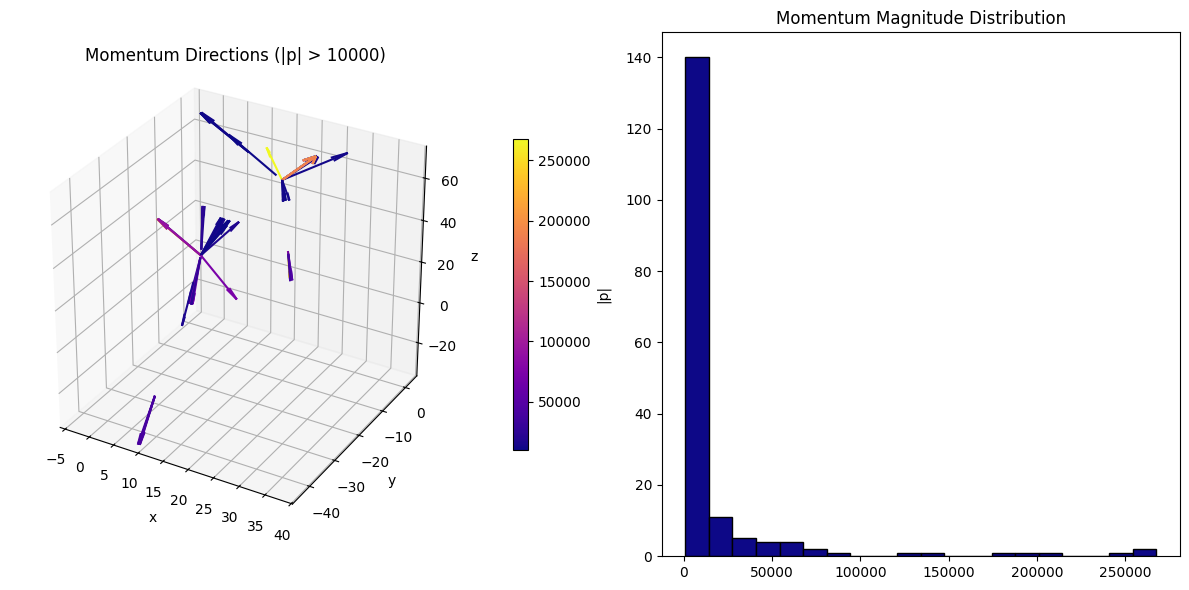

In [9]:
visualize_event_momentum(truth_array[1], 10000)

## 1. Group Particles into Showers


### 1.1 Energy Weighted K-Means

In [10]:
from sklearn.metrics import pairwise_distances_argmin
from sklearn.cluster import kmeans_plusplus

def energy_weighted_kmeans(event, n_clusters=6, max_iter=100, tol=1e-4, plot=True, show_message=False):
    """
    Performs energy-weighted K-Means clustering on particle production vertices.

    Parameters:
        event: awkward.Array    - Event data with true particle-level information.
                                 Must contain fields: 'prod_x_true', 'prod_y_true', 'prod_z_true', 'p_true'
        n_clusters: int         - Number of clusters to form (default: 6)
        max_iter: int           - Maximum number of iterations for convergence (default: 100)
        tol: float              - Convergence threshold on centroid shift (default: 1e-4)
        plot: bool              - If True, plot 3D clustering result (default: True)
        show_message: bool      - If True, print message upon convergence (default: False)

    Behavior:
        - Initializes centroids using KMeans++ from sklearn
        - Assigns particles to nearest centroid based on Euclidean distance
        - Updates centroids as energy-weighted mean of assigned points
        - Reinitializes empty clusters with random points
        - Stops iterating when centroid shift is below tolerance

    Returns:
        labels: ndarray (N,)         - Cluster label assigned to each particle
        centroids: ndarray (n x 3)   - Final centroid positions in 3D space
    """


    np.random.seed(0)
    x = np.array(event['prod_x_true'])
    y = np.array(event['prod_y_true'])
    z = np.array(event['prod_z_true'])
    
    X = np.stack((x, y, z), axis=1)  # shape (N, 3)
    # ! Not actually the energy, but momentum
    energy = np.array(event['p_true'])
    
    N = X.shape[0]

    # Initialize centroids from points
    centroids, _ = kmeans_plusplus(X, n_clusters=n_clusters, random_state=0)

    for i in range(max_iter):
        # Assignment step (standard, unweighted distance)
        labels = pairwise_distances_argmin(X, centroids)

        # Update step (energy-weighted mean)
        new_centroids = np.zeros_like(centroids)
        for k in range(n_clusters):
            mask = labels == k
            if np.sum(mask) == 0:
                # Reinitialize empty cluster to a random point
                new_centroids[k] = X[np.random.randint(0, N)]
            else:
                weights = energy[mask]
                points = X[mask]
                new_centroids[k] = np.average(points, axis=0, weights=weights)

        # Convergence check
        shift = np.linalg.norm(centroids - new_centroids)
        centroids = new_centroids
        if shift < tol:
            if show_message:
                print(f"Converged after {i} iterations")
            break
            
    if plot:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        scatter = ax.scatter(x, y, z, c=labels, cmap='plasma', s=10)
        ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], color='black', marker='x', s=100)
        plt.title("Energy-Weighted K-Means Clustering")
        plt.show()
    
    return labels, centroids


Converged after 2 iterations


/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/619999430.py:31: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(event['prod_x_true'])
/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/619999430.py:32: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  y = np.array(event['prod_y_true'])
/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/619999430.py:33: DeprecationWarning: __array__ implementation doesn't accept a copy keywor

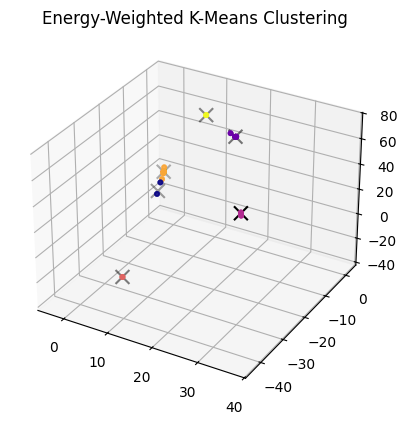

[5 5 5 5 5 5 5 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 4 0 0 0 0 0 0 0 0 0 0
 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
[[ 1.8980581e-02 -6.8451080e+00 -3.0696573e+00]
 [ 1.7040819e+01 -4.8741879e+00  5.4376682e+01]
 [ 3.6766365e+01 -4.2330048e+01  7.2181892e+01]
 [ 3.6422772e+00 -2.9016737e+01 -3.4571712e+01]
 [-2.6405258e+00  7.0819384e-01 -1.1970514e+00]
 [ 8.7221861e+00 -1.6697479e+00  5.9233234e+01]]


In [11]:
labels, centroids = energy_weighted_kmeans(truth_array[1], n_clusters=6, show_message=True)
print(labels)
print(centroids)

In [12]:
def compute_ewc_from_clustered_event(event):
    """
    Compute energy-weighted centroids from an event where particles are grouped by cluster,
    and include total pt per cluster.

    Parameters:
        event: awkward.Record
            - Must contain fields: 'cl_cell_xCells', 'cl_cell_yCells', 'cl_cell_zCells', 'cl_cell_pt'

    Returns:
        result: numpy array (n_clusters, 4)
            - Columns: [x_centroid, y_centroid, z_centroid, total_pt]
    """
    centroids_with_pt = []

    n_clusters = len(event['cl_cell_xCells'])

    for i in range(n_clusters):
        total_pt = np.array(event['cl_pt'][i])
        if total_pt < 1e4:
            continue
        x = np.array(event['cl_cell_xCells'][i])
        y = np.array(event['cl_cell_yCells'][i])
        z = np.array(event['cl_cell_zCells'][i])
        energy = np.array(event['cl_cell_pt'][i])

        if len(energy) == 0:
            centroids_with_pt.append([np.nan, np.nan, np.nan, 0.0])
            continue

        points = np.stack((x, y, z), axis=1)
        weighted_mean = np.average(points, axis=0, weights=energy)
        #total_pt = np.sum(energy)

        centroids_with_pt.append(list(weighted_mean) + [total_pt])

    return np.array(centroids_with_pt)

In [13]:
event = calo_array[0]
centies = compute_ewc_from_clustered_event(event)
print(centies)

[[-1.20232825e+03 -1.37056494e+03 -9.00775024e+02  4.00224562e+05]
 [-4.82127411e+02  1.80393567e+03 -3.97075049e+03  1.82161188e+05]
 [ 1.67203979e+03  8.70037937e+00  1.83813232e+03  1.64831750e+05]
 [-1.65021924e+03 -1.91183203e+03 -1.04843689e+03  1.89239438e+05]
 [-1.51010449e+03 -1.96055261e+03 -1.17488879e+03  9.98060156e+04]
 [-5.03766724e+02  1.81037842e+03 -3.52581494e+03  5.47608789e+04]
 [ 1.48603101e+03  6.39419556e+02 -2.82112598e+03  3.99554453e+04]
 [ 1.48123389e+03  7.17364380e+02 -2.76796851e+03  3.94027578e+04]
 [ 8.49995972e+02  2.33554321e+03 -3.80316943e+03  3.34307305e+04]
 [ 1.56593677e+03  4.42512909e+02 -2.77321753e+03  2.62017109e+04]
 [ 2.47047485e+03 -8.90956116e+02  2.01788062e+03  2.71438906e+04]
 [-1.99212207e+03  1.26103137e+03  1.12897144e+03  2.75855273e+04]
 [ 1.56457520e+03  6.05741455e+02 -2.75938428e+03  2.47559531e+04]
 [ 1.05031458e+03 -3.60428467e+02  4.57211621e+03  2.13056953e+04]
 [ 1.54219019e+03 -5.72443176e+02  1.21448669e+03  1.74159512e

/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/2884982103.py:22: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(event['cl_cell_xCells'][i])
/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/2884982103.py:23: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  y = np.array(event['cl_cell_yCells'][i])
/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/2884982103.py:24: DeprecationWarning: __array__ implementation doesn't accep

## 2. Summarize each particle shower

In [14]:
for event in calo_array:
    pt_sums = ak.sum(event['cl_cell_pt'], axis=1)
    print(f"{len(event['cl_pt'])}    {len(event['cl_cell_pt'])}     {len(pt_sums)}")
    

227    227     227
176    176     176
237    237     237
187    187     187
290    290     290
200    200     200
200    200     200
207    207     207
336    336     336
127    127     127
181    181     181
157    157     157
221    221     221
184    184     184
249    249     249
250    250     250
295    295     295
265    265     265
249    249     249
233    233     233
133    133     133
227    227     227
224    224     224
280    280     280
215    215     215
259    259     259
281    281     281
337    337     337
267    267     267
154    154     154
204    204     204
247    247     247
346    346     346
224    224     224
269    269     269
191    191     191
324    324     324
389    389     389
324    324     324
289    289     289
272    272     272
312    312     312
209    209     209
220    220     220
278    278     278
310    310     310
256    256     256
410    410     410
265    265     265
314    314     314
489    489     489
193    193     193
205    205  

In [15]:
calo_array[0]['cl_pt']

<Array [4e+05, 1.82e+05, 1.65e+05, ..., 355, 412, 662] type='227 * float32'>

In [16]:
pt_sums = ak.sum(calo_array[0]['cl_cell_pt'], axis=1)
pt_sums

<Array [4.14e+05, 1.59e+05, 1.43e+05, ..., -408, -662] type='227 * float32'>

In [17]:
"""
Applies energy-weighted K-Means clustering to each event and groups true particle features by cluster.

Parameters:
    truth_array: awkward.Array - Array of events with particle-level truth information.
                                    Each event must contain fields: 
                                    'prod_x_true', 'prod_y_true', 'prod_z_true',
                                    'calo_x_true', 'calo_y_true', 'calo_z_true',
                                    'px_true', 'py_true', 'pz_true',
                                    'p_true', 'times_ATLAS_true', 'n_true'

Behavior:
    - Runs energy-weighted K-Means clustering on each event with `n_clusters` clusters
    - Extracts a defined set of fields per cluster
    - Computes transverse momentum (pt = sqrt(px² + py²)) per particle and stores it as 'cell_pt'
    - Skips clusters with no assigned particles
    - Aggregates results into a list of structured dictionaries, one per event

Returns:
    clustered_truth_array: awkward.Array - Structured array of clustered particle data per event,
                                            including cluster-wise field groupings and per-cluster pt
"""

n_clusters = 6
clustered_truth_particles = []

# Fields to extract and group per cluster
cluster_fields = [
    'prod_x_true', 'prod_y_true', 'prod_z_true',
    'calo_x_true', 'calo_y_true', 'calo_z_true',
    'px_true', 'py_true', 'pz_true',
    'p_true', 'times_ATLAS_true'
]

for event in truth_array:
    labels, centroids = energy_weighted_kmeans(event, n_clusters=n_clusters, plot=False, show_message=True)

    # Initialize field containers
    clustered_data = {field: [] for field in cluster_fields}
    cell_pt = []
    cluster_pt = []
    average_time = []

    for cluster_id in range(n_clusters):
        mask = labels == cluster_id
        if np.sum(mask) == 0:
            continue

        for field in cluster_fields:
            clustered_data[field].append(event[field][mask])

        # Compute transverse momentum (pt) per particle in this cluster
        px = event['px_true'][mask]
        py = event['py_true'][mask]
        times = event['times_ATLAS_true'][mask]

        # ? Should I use p instead of pt?
        pt = np.sqrt(px**2 + py**2)
        cell_pt.append(pt)
        cluster_pt.append(np.sum(pt))
        average_time.append(np.mean(times))

# ! I should add the time average for the cluster here and then fix the last cell
    clustered_truth_particles.append({
        'n_true': event['n_true'],
        **clustered_data,
        'cell_pt': cell_pt,
        'centroid_x': [c[0] for c in centroids],
        'centroid_y': [c[1] for c in centroids],
        'centroid_z': [c[2] for c in centroids],
        'cl_pt': cluster_pt,
        'cl_time': average_time
    })
    # är det inte konstigt att den convergar med så få iteratiorner?
clustered_truth_array = ak.Array(clustered_truth_particles)
print(clustered_truth_array.type.show())

Converged after 1 iterations
Converged after 2 iterations


/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/619999430.py:31: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(event['prod_x_true'])
/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/619999430.py:32: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  y = np.array(event['prod_y_true'])
/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/619999430.py:33: DeprecationWarning: __array__ implementation doesn't accept a copy keywor

Converged after 1 iterations
Converged after 1 iterations


/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/619999430.py:31: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(event['prod_x_true'])
/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/619999430.py:32: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  y = np.array(event['prod_y_true'])
/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/619999430.py:33: DeprecationWarning: __array__ implementation doesn't accept a copy keywor

Converged after 1 iterations
Converged after 1 iterations
Converged after 1 iterations
Converged after 1 iterations
Converged after 1 iterations
Converged after 1 iterations
Converged after 1 iterations
Converged after 1 iterations
Converged after 1 iterations
Converged after 1 iterations
Converged after 1 iterations
Converged after 1 iterations


/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/619999430.py:31: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(event['prod_x_true'])
/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/619999430.py:32: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  y = np.array(event['prod_y_true'])
/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/619999430.py:33: DeprecationWarning: __array__ implementation doesn't accept a copy keywor

Converged after 1 iterations
Converged after 1 iterations
Converged after 1 iterations
Converged after 1 iterations


/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/619999430.py:31: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(event['prod_x_true'])
/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/619999430.py:32: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  y = np.array(event['prod_y_true'])
/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/619999430.py:33: DeprecationWarning: __array__ implementation doesn't accept a copy keywor

Converged after 2 iterations
Converged after 1 iterations
Converged after 1 iterations
Converged after 1 iterations
Converged after 1 iterations
Converged after 1 iterations
Converged after 1 iterations
Converged after 1 iterations
Converged after 1 iterations


/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/619999430.py:31: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(event['prod_x_true'])
/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/619999430.py:32: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  y = np.array(event['prod_y_true'])
/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/619999430.py:33: DeprecationWarning: __array__ implementation doesn't accept a copy keywor

Converged after 1 iterations
Converged after 1 iterations
Converged after 1 iterations


/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/619999430.py:31: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(event['prod_x_true'])
/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/619999430.py:32: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  y = np.array(event['prod_y_true'])
/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/619999430.py:33: DeprecationWarning: __array__ implementation doesn't accept a copy keywor

Converged after 1 iterations
Converged after 1 iterations
Converged after 1 iterations
Converged after 3 iterations
Converged after 1 iterations
Converged after 1 iterations
Converged after 1 iterations
Converged after 1 iterations
Converged after 1 iterations
Converged after 1 iterations


/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/619999430.py:31: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(event['prod_x_true'])
/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/619999430.py:32: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  y = np.array(event['prod_y_true'])
/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/619999430.py:33: DeprecationWarning: __array__ implementation doesn't accept a copy keywor

Converged after 1 iterations
Converged after 1 iterations


/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/619999430.py:31: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(event['prod_x_true'])
/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/619999430.py:32: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  y = np.array(event['prod_y_true'])
/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/619999430.py:33: DeprecationWarning: __array__ implementation doesn't accept a copy keywor

Converged after 1 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 1 iterations
Converged after 1 iterations
Converged after 1 iterations
Converged after 1 iterations
Converged after 1 iterations
Converged after 1 iterations
Converged after 1 iterations
Converged after 1 iterations


/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/619999430.py:31: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(event['prod_x_true'])
/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/619999430.py:32: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  y = np.array(event['prod_y_true'])
/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/619999430.py:33: DeprecationWarning: __array__ implementation doesn't accept a copy keywor

Converged after 1 iterations
Converged after 1 iterations


/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/619999430.py:31: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(event['prod_x_true'])
/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/619999430.py:32: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  y = np.array(event['prod_y_true'])
/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/619999430.py:33: DeprecationWarning: __array__ implementation doesn't accept a copy keywor

Converged after 1 iterations
Converged after 1 iterations
Converged after 1 iterations
Converged after 1 iterations
Converged after 1 iterations
Converged after 1 iterations
Converged after 1 iterations
Converged after 1 iterations
Converged after 1 iterations
Converged after 2 iterations
Converged after 3 iterations


/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/619999430.py:31: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(event['prod_x_true'])
/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/619999430.py:32: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  y = np.array(event['prod_y_true'])
/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/619999430.py:33: DeprecationWarning: __array__ implementation doesn't accept a copy keywor

Converged after 1 iterations
Converged after 1 iterations


/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/619999430.py:31: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(event['prod_x_true'])
/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/619999430.py:32: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  y = np.array(event['prod_y_true'])
/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/619999430.py:33: DeprecationWarning: __array__ implementation doesn't accept a copy keywor

Converged after 1 iterations
Converged after 1 iterations
Converged after 1 iterations
Converged after 1 iterations
Converged after 1 iterations
Converged after 1 iterations
Converged after 1 iterations
Converged after 1 iterations
Converged after 1 iterations
Converged after 1 iterations
Converged after 1 iterations


/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/619999430.py:31: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(event['prod_x_true'])
/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/619999430.py:32: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  y = np.array(event['prod_y_true'])
/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/619999430.py:33: DeprecationWarning: __array__ implementation doesn't accept a copy keywor

Converged after 1 iterations
Converged after 1 iterations


/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/619999430.py:31: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(event['prod_x_true'])
/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/619999430.py:32: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  y = np.array(event['prod_y_true'])
/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/619999430.py:33: DeprecationWarning: __array__ implementation doesn't accept a copy keywor

Converged after 1 iterations
Converged after 1 iterations
Converged after 2 iterations
Converged after 1 iterations
Converged after 1 iterations
Converged after 1 iterations
Converged after 1 iterations
Converged after 1 iterations
Converged after 1 iterations
Converged after 1 iterations


/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/619999430.py:31: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(event['prod_x_true'])
/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/619999430.py:32: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  y = np.array(event['prod_y_true'])
/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/619999430.py:33: DeprecationWarning: __array__ implementation doesn't accept a copy keywor

Converged after 1 iterations
Converged after 1 iterations


/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/619999430.py:31: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(event['prod_x_true'])
/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/619999430.py:32: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  y = np.array(event['prod_y_true'])
/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/619999430.py:33: DeprecationWarning: __array__ implementation doesn't accept a copy keywor

Converged after 2 iterations
Converged after 1 iterations
Converged after 1 iterations
Converged after 1 iterations
Converged after 1 iterations


/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/619999430.py:31: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(event['prod_x_true'])
/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/619999430.py:32: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  y = np.array(event['prod_y_true'])
/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/619999430.py:33: DeprecationWarning: __array__ implementation doesn't accept a copy keywor

100 * {
    n_true: var * int64,
    prod_x_true: var * var * float64,
    prod_y_true: var * var * float64,
    prod_z_true: var * var * float64,
    calo_x_true: var * var * float64,
    calo_y_true: var * var * float64,
    calo_z_true: var * var * float64,
    px_true: var * var * float64,
    py_true: var * var * float64,
    pz_true: var * var * float64,
    p_true: var * var * float64,
    times_ATLAS_true: var * var * float64,
    cell_pt: var * var * float64,
    centroid_x: var * float64,
    centroid_y: var * float64,
    centroid_z: var * float64,
    cl_pt: var * float64,
    cl_time: var * float64
}
None


In [18]:
print(clustered_truth_array[0]['p_true'])
print(clustered_truth_array[0]['centroid_x'])
print(clustered_truth_array[0]['centroid_y'])
print(clustered_truth_array[0]['centroid_z'])
print(np.mean(clustered_truth_array[0]['times_ATLAS_true'][3]))
print(clustered_truth_array[0]['cl_time'])

[[4.18e+04, 4.32e+04, 5.52e+04, ..., 2.56e+03, 3.7e+04, 2.29e+04], ..., [...]]
[150, -329, -156, 184, -151, -340]
[33.7, -263, -38.8, 32.5, -27.1, -278]
[-18.3, -461, -376, 22.7, -393, -467]
1.061296010017395
[1.46, 0.212, 1.07, 1.06, 1.08, 0.145]


# 3. Match Showers to Clusters

In [19]:
"""Prints the total momentum of each cluster in the event"""
# ? should I sum absolute values or not?
index = 1
nested_list = calo_array[index]['cl_cell_pt']

print("Calorimeter cluster pt:")
for idx, sublist in enumerate(nested_list):
    sublist_sum = sum(abs(sublist))
    if sublist_sum > 100000:
        print(f"Sum of sublist {idx}: {sublist_sum}")

print("\n")

nested_list = clustered_truth_array[index]['cell_pt']

print("Truth cluster pt:")
for idx, sublist in enumerate(nested_list):
    sublist_sum = sum(abs(sublist))
    print(f"Sum of sublist {idx}: {sublist_sum}")

Calorimeter cluster pt:
Sum of sublist 0: 339484.75
Sum of sublist 1: 222866.3125
Sum of sublist 2: 142190.421875
Sum of sublist 3: 126447.46875
Sum of sublist 4: 244672.796875


Truth cluster pt:
Sum of sublist 0: 52853.76452636719
Sum of sublist 1: 815527.2943725586
Sum of sublist 2: 394145.4794921875
Sum of sublist 3: 130852.580078125
Sum of sublist 4: 1146036.6505737305
Sum of sublist 5: 53341.171875


It looks like there are only a few clusters in calocells that have high enough ```pt``` to be mapped, so it looks promising

In [20]:
def extract_features_awkward(arr, features=("x", "y", "z", "pt")):
    """
    Converts an Awkward Array of objects with specified feature keys into a NumPy array.

    Parameters:
        arr: awkward.Array - Input Awkward Array with feature fields
        features: tuple - Names of the features to extract, in order

    Returns:
        np.ndarray of shape (n_objects, len(features)) if flat,
        or (n_events, variable-length, len(features)) if nested.
    """
    columns = [ak.to_numpy(arr[feature]) for feature in features]
    stacked = np.stack(columns, axis=1)

    return stacked

In [21]:
from scipy.spatial.distance import cdist
import ot

def match_showers_to_clusters(
    X,
    Y,
    w_pos=1.0,
    w_pt=0.05,
    reg=3,
    threshold=0.0001,
    use_dummy=True,
    dummy_cost=5.0,
    return_plan=False,
    verbose=False,
    plot=False
):
    """
    Matches particle showers to detector clusters using Sinkhorn Optimal Transport.

    Parameters:
        X: ndarray (n x d) - Features of true showers (e.g. [x, y, z, pt])
        Y: ndarray (m x d) - Features of measured clusters
        w_pos: float       - Weight for spatial features
        w_pt: float    - Weight for pt feature
        threshold: float   - Threshold on transport matrix to consider a match
        use_dummy: bool    - Whether to add a dummy cluster to absorb unmatched showers
        dummy_cost: float  - Cost assigned to dummy cluster
        return_plan: bool  - If True, return the full transport plan P

    Returns:
        matches: list of (i, j, score) - List of matched shower/cluster pairs with confidence scores
        (Optional) P: transport plan matrix (n x m(+1) if dummy used)
    """
    # Normalize features
    all_data = np.vstack([X, Y])
    mean = all_data.mean(axis=0)
    std = all_data.std(axis=0)
    X_norm = (X - mean) / std
    Y_norm = (Y - mean) / std

    # Compute cost matrix
    C = (
        w_pos * cdist(X_norm[:, :3], Y_norm[:, :3], metric='sqeuclidean') +
        w_pt * cdist(X_norm[:, 3:4], Y_norm[:, 3:4], metric='sqeuclidean')
    )
    # Normalize cost matrix
    C /= C.std()

    if verbose:
        print("Min:", C.min(), "Mean:", C.mean(), "Max:", C.max())
        print("C range:", C.min(), C.mean(), C.max(), " | reg =", reg)
        print("exp(-C.max()/reg) =", np.exp(-C.max() / reg))

    # Add dummy cluster if enabled
    if use_dummy:
        dummy_col = dummy_cost * np.ones((X.shape[0], 1))
        C = np.hstack([C, dummy_col])

    # Define source and target distributions
    a = np.ones(X.shape[0]) / X.shape[0]
    b = np.ones(C.shape[1]) / C.shape[1]

    # Compute Sinkhorn transport plan
    P = ot.sinkhorn(a, b, C, reg=reg)

    # print dummy mass
    dummy_mass = P[:, -1].sum()
    if verbose:
        print(f"Total dummy mass: {dummy_mass:.2f}")

    if plot:
        plt.imshow(C, cmap="plasma", aspect="auto")
        plt.colorbar()
        plt.title("Cost Matrix")

    # Extract matches above threshold
    matches = []
    for i in range(P.shape[0]):
        for j in range(P.shape[1]):
            if P[i, j] > threshold and (not use_dummy or j < Y.shape[0]):
                matches.append((i, j, P[i, j]))

    return (matches, P) if return_plan else matches

In [22]:
X = extract_features_awkward(clustered_truth_array[10], features=("centroid_x", "centroid_y", "centroid_z", "cl_pt"))
Y = compute_ewc_from_clustered_event(calo_array[10])
print(X)
print("")
print(Y)
print("")

matches, P = match_showers_to_clusters(X, Y, return_plan=True, reg=0.2, threshold=0.01, dummy_cost=0.5, verbose=True)

print("\nTop matches:")
for i, j, p_ij in sorted(matches, key=lambda x: -x[2])[:10]:
    print(f"Shower {i} → Cluster {j} | Match strength = {p_ij:.4f}")

print(f"Event {i} matched {len(matches)} showers to clusters")


[[ 3.63211846e+00  7.95376730e+00  3.56362457e+01  8.93684000e+05]
 [ 2.83517323e+01 -1.56174347e+02  1.28488281e+03  5.63388438e+05]
 [ 6.00251160e+01 -1.66294296e+02  1.47542639e+03  1.09650844e+05]
 [-2.97481785e+01  2.37379589e+01  3.29106522e+01  4.08198344e+05]
 [ 4.11955376e+01 -1.60322311e+02  1.36002393e+03  9.98440781e+04]
 [ 1.94273529e+01 -1.40518738e+02  1.28175818e+03  1.71014547e+05]]

[[-1.38890833e+03  9.68023132e+02  6.09338745e+02  2.17744938e+05]
 [-4.53266357e+02 -2.88716528e+03  2.41312061e+03  1.88352516e+05]
 [ 2.70060083e+03 -8.38755371e+02  3.58868945e+03  1.51968734e+05]
 [ 4.96996124e+02 -2.96163483e+02  4.13435596e+03  1.42805344e+05]
 [ 1.59293225e+03 -4.99716705e+02  2.12308545e+03  1.44972250e+05]
 [-1.53256531e+03  6.63003662e+02  9.17108078e+01  1.34940094e+05]
 [-1.41140198e+03  2.34856909e+03  2.02420361e+03  7.21238672e+04]
 [ 1.69305200e+03 -1.49259552e+02 -7.22390259e+02  6.23294258e+04]
 [-8.23655945e+02  1.50988489e+03  1.75648291e+03  4.3227296

/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/2884982103.py:22: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(event['cl_cell_xCells'][i])
/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/2884982103.py:23: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  y = np.array(event['cl_cell_yCells'][i])
/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/2884982103.py:24: DeprecationWarning: __array__ implementation doesn't accep

In [23]:
all_probs = []

for event_idx in range(len(clustered_truth_array)):
    try:
        # Extract features
        X = extract_features_awkward(clustered_truth_array[event_idx], features=("centroid_x", "centroid_y", "centroid_z", "cl_pt"))
        Y = compute_ewc_from_clustered_event(calo_array[event_idx])

        if len(X) == 0 or len(Y) == 0:
            continue

        # Run matching
        matches, P = match_showers_to_clusters(X, Y, return_plan=True, reg=0.2, threshold=0.0, dummy_cost=0.5, verbose=False)

        # Store all non-dummy P[i,j] values
        P_actual = P[:, :-1] if P.shape[1] > Y.shape[0] else P
        all_probs.extend(P_actual.flatten())

    except Exception as e:
        print(f"Skipping event {event_idx}: {e}")

/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/2884982103.py:22: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(event['cl_cell_xCells'][i])
/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/2884982103.py:23: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  y = np.array(event['cl_cell_yCells'][i])
/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/2884982103.py:24: DeprecationWarning: __array__ implementation doesn't accep

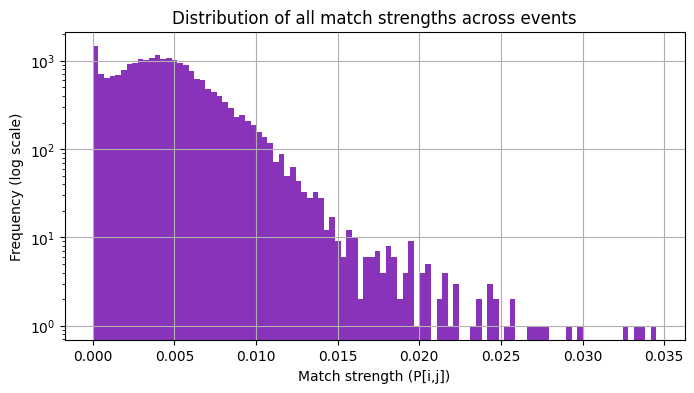

In [24]:
plt.figure(figsize=(8, 4))
plt.hist(all_probs, bins=100, log=True, color=cm.plasma(0.2), alpha=0.8)
plt.xlabel("Match strength (P[i,j])")
plt.ylabel("Frequency (log scale)")
plt.title("Distribution of all match strengths across events")
plt.grid(True)
plt.show()

In [25]:
all_probs = np.array(all_probs)
print("Match strength stats:")
print(f"Min: {all_probs.min():.6f}")
print(f"Mean: {all_probs.mean():.6f}")
print(f"Max: {all_probs.max():.6f}")
print(f"95th percentile: {np.percentile(all_probs, 99):.6f}")

threshold = 0.012
above_threshold = np.sum(np.array(all_probs) > threshold)

print(f"Number of match strengths above {threshold}: {above_threshold}")
total = len(all_probs)
percent = 100 * above_threshold / total if total > 0 else 0

print(f"{percent:.2f}% of all match values are above {threshold}")

Match strength stats:
Min: 0.000000
Mean: 0.004427
Max: 0.034521
95th percentile: 0.013487
Number of match strengths above 0.012: 404
1.84% of all match values are above 0.012


For matching the clusters, I have two thoughts:
- map anything above a certain threshold
- map anything above a certain threshold up to a certain number per cluster

In [27]:
import torch
from torch_geometric.data import Data
from torch_geometric.nn import radius_graph
#from sklearn.neighbors import NearestNeighbors

graphs = []

for event_idx in range(len(clustered_truth_array)):
    matched_clusters = []

    try:
        # === Get feature arrays for matching
        X = extract_features_awkward(clustered_truth_array[event_idx], features=("centroid_x", "centroid_y", "centroid_z", "cl_pt"))
        Y = compute_ewc_from_clustered_event(calo_array[event_idx])

        if len(X) == 0 or len(Y) == 0:
            continue

        # === Run Sinkhorn
        matches, P = match_showers_to_clusters(X, Y, reg=0.2, threshold=0.011, dummy_cost=0.5, return_plan=True, verbose=False)

        for i, j, p_ij in matches:
            if j >= Y.shape[0]:
                continue

            true_time = np.array(clustered_truth_array[event_idx]["cl_time"][i])

            cell_x = np.array(calo_array[event_idx]['cl_cell_xCells'][j])
            cell_y = np.array(calo_array[event_idx]['cl_cell_yCells'][j])
            cell_z = np.array(calo_array[event_idx]['cl_cell_zCells'][j])
            cell_E = np.array(calo_array[event_idx]['cl_cell_E'][j])
            cell_T = np.array(calo_array[event_idx]['cl_cell_TimeCells'][j])

            # --- Step 2: Build node feature matrix
            node_features = torch.tensor(np.stack([cell_x, cell_y, cell_z, cell_E, cell_T], axis=1), dtype=torch.float)

            # --- Step 3: Build edges using Radius on (x, y, z)        
            pos = node_features[:, :3] # Gets (x, y, z) from features
            """### ADJUST RADIUS BASE ON DETECTOR GEOMETRY"""
            edge_index = radius_graph(pos, r=150)

            # --- Step 4: Cluster time (target value)
            """### Need to be changed for actual target values"""
            cluster_times = np.zeros(len(cell_T))        
            target = torch.tensor(0.0, dtype=torch.float)

            # --- Step 5: Build graph
            graph = Data(x=node_features, edge_index=edge_index, y=target)
            graphs.append(graph)

    except Exception as e:
        print(f"Skipping event {event_idx}: {e}")
        continue




/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/2884982103.py:22: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(event['cl_cell_xCells'][i])
/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/2884982103.py:23: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  y = np.array(event['cl_cell_yCells'][i])
/var/folders/fh/f1h357gx2zb13g6jzscm4h_80000gn/T/ipykernel_6119/2884982103.py:24: DeprecationWarning: __array__ implementation doesn't accep

Skipping event 0: 'radius_graph' requires 'torch-cluster'
Skipping event 2: 'radius_graph' requires 'torch-cluster'
Skipping event 3: 'radius_graph' requires 'torch-cluster'
Skipping event 5: 'radius_graph' requires 'torch-cluster'
Skipping event 6: 'radius_graph' requires 'torch-cluster'
Skipping event 8: 'radius_graph' requires 'torch-cluster'
Skipping event 9: 'radius_graph' requires 'torch-cluster'
Skipping event 10: 'radius_graph' requires 'torch-cluster'
Skipping event 11: 'radius_graph' requires 'torch-cluster'
Skipping event 12: 'radius_graph' requires 'torch-cluster'
Skipping event 13: 'radius_graph' requires 'torch-cluster'
Skipping event 16: 'radius_graph' requires 'torch-cluster'
Skipping event 19: 'radius_graph' requires 'torch-cluster'
Skipping event 21: 'radius_graph' requires 'torch-cluster'
Skipping event 22: 'radius_graph' requires 'torch-cluster'
Skipping event 25: 'radius_graph' requires 'torch-cluster'
Skipping event 26: 'radius_graph' requires 'torch-cluster'
Skip

In [ ]:
print(clustered_truth_array.type.show())
print(calo_array.type.show())

100 * {
    n_true: var * int64,
    prod_x_true: var * var * float64,
    prod_y_true: var * var * float64,
    prod_z_true: var * var * float64,
    calo_x_true: var * var * float64,
    calo_y_true: var * var * float64,
    calo_z_true: var * var * float64,
    px_true: var * var * float64,
    py_true: var * var * float64,
    pz_true: var * var * float64,
    p_true: var * var * float64,
    times_ATLAS_true: var * var * float64,
    cell_pt: var * var * float64,
    centroid_x: var * float64,
    centroid_y: var * float64,
    centroid_z: var * float64,
    cl_pt: var * float64,
    cl_time: var * float64
}
None
100 * {
    cl_pt: var * float32,
    cl_cell_n: var * int32,
    cl_cell_E: var * var * float32,
    cl_cell_pt: var * var * float32,
    cl_cell_eta: var * var * float32,
    cl_cell_phi: var * var * float32,
    cl_cell_QCells: var * var * int32,
    cl_cell_GainCells: var * var * int32,
    cl_cell_DetCells: var * var * int32,
    cl_cell_TimeCells: var * var * float3